In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_churndata = pd.read_csv('churn_data.csv')

In [3]:
df_churndata.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df_churndata.describe(include='O')

,housing,payment_type,zodiac_sign
count,27000,27000,27000
unique,3,5,13
top,na,Bi-Weekly,Cancer
freq,13860,12716,2424


In [5]:
df_churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [6]:
df_churndata.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
df_churndata.isnull().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [8]:
df_churndata.isna().sum()
df_churndata.shape

(27000, 31)

In [9]:
df_churndata = df_churndata.drop(columns=['reward_rate','credit_score'],axis = 1)

In [10]:
df_churndata.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'is_referred'],
      dtype='object')

In [11]:
#removing the rows were age data is missing
df_churndata = df_churndata[pd.notnull(df_churndata['age'])]

In [12]:
df_churndata.shape

(26996, 29)

In [13]:
df_churndata_2 = df_churndata.drop(columns=['churn','user'])

In [14]:
for i in df_churndata_2.columns:
    print(i)

age
housing
deposits
withdrawal
purchases_partners
purchases
cc_taken
cc_recommended
cc_disliked
cc_liked
cc_application_begin
app_downloaded
web_user
app_web_user
ios_user
android_user
registered_phones
payment_type
waiting_4_loan
cancelled_loan
received_loan
rejected_loan
zodiac_sign
left_for_two_month_plus
left_for_one_month
rewards_earned
is_referred


In [15]:
#for i in df_churndata_2.columns:
   # f, axes = plt.subplots(df_churndata_2.shape[0], 2, figsize=(7, 7), sharex=True)
    #sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   # sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   ### sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   # sns.distplot( df_churndata_2[i] , color="skyblue", ax=axes[0, 0])
   # sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
   # sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
   # sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])

In [16]:

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

In [17]:
'''''
fig, axs = plt.subplots(10, 2, sharey=True, tight_layout=True)
for i in range(1,10):
    
    plt.hist(df_churndata_2.iloc[:,i])'''
    

"''\nfig, axs = plt.subplots(10, 2, sharey=True, tight_layout=True)\nfor i in range(1,10):\n    \n    plt.hist(df_churndata_2.iloc[:,i])"

In [18]:
df_churndata_2.columns

Index(['age', 'housing', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'is_referred'],
      dtype='object')

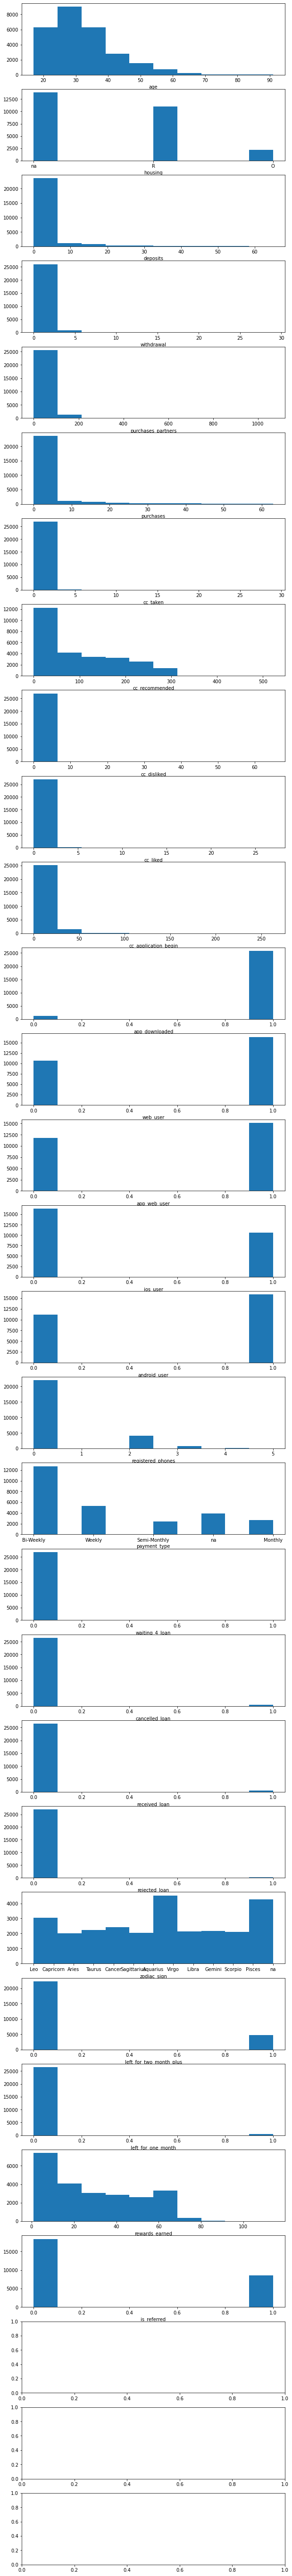

In [48]:
%matplotlib inline
fig, axes = plt.subplots(30, 1, figsize=(10, 100),squeeze=False)
f=axes.flatten()
for i, feature in enumerate(df_churndata_2.columns):
    
 f[i].hist(df_churndata_2[feature])
 f[i].set_xlabel(df_churndata_2.columns[i])
plt.show()

    


 

